In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

### Line-plot
Draw a line-plot for the age-specific height averages for men and women

- Men are represented in blue and women in red
- Use x_label() and y_label(), title(), and legend() to draw
- Use xticks() to separate the intervals on the x-axis graph
  - Separate into 10 units from 20 to 60.

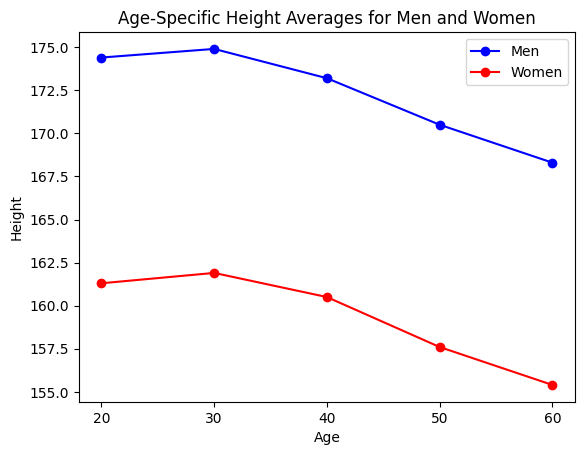

In [4]:
# Sample data
age = [20, 30, 40, 50, 60]
height_averages_men = [174.4, 174.9, 173.2, 170.5, 168.3]
height_averages_women = [161.3, 161.9, 160.5, 157.6, 155.4]

# Plot men's data in blue
plt.plot(age, height_averages_men, marker='o', color='blue', label='Men')

# Plot women's data in red
plt.plot(age, height_averages_women, marker='o', color='red', label='Women')

# Separate x-axis into 10-unit intervals from 20 to 60
plt.xticks(np.arange(20, 70, 10))

# Label the axes and add a title
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Age-Specific Height Averages for Men and Women")

# Add a legend to distinguish between men and women
plt.legend()

# Show the plot
plt.show()


###Histogram Plot with Barplot
Draw the horsepower mean by type

- df_sample should contain only `Type` and `Horsepower` properties
- Drop the `NAN` value

Returns all the number of times for each value in the `Type`


In [14]:
# Assuming you have a DataFrame df_sample with a 'Type' column
# Drop NaN values
df.dropna(subset=['Type'], inplace=True)

# Count the number of occurrences of each 'Type'
type_counts = df['Type'].value_counts()

# Display the counts for each unique 'Type'
print(type_counts)


Midsize    20
Small      19
Compact    15
Sporty     12
Large      10
Van         7
Name: Type, dtype: int64






Use barh() to draw the histogram by `Type`


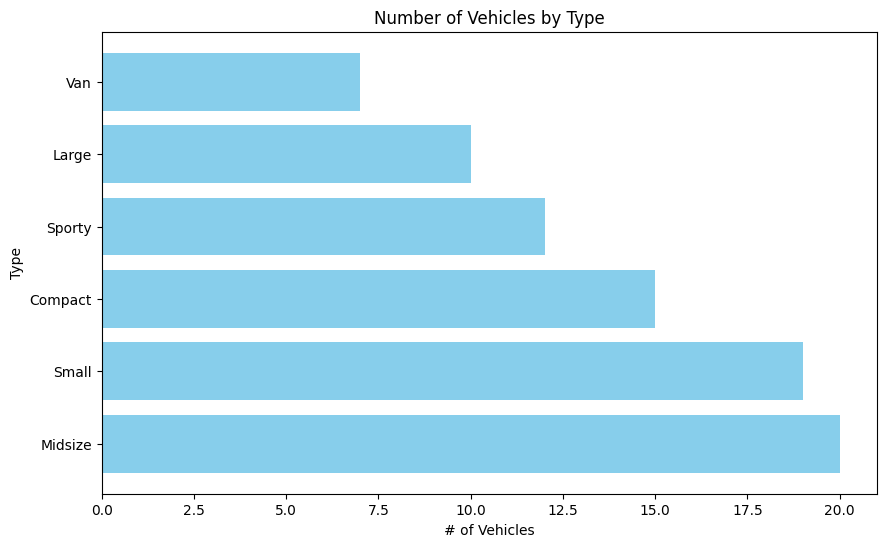

In [10]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_counts.index, type_counts.values, color='skyblue')
plt.title('Number of Vehicles by Type')
plt.xlabel('# of Vehicles')
plt.ylabel('Type')

# Display the plot
plt.show()

### Pie Plot

Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).
Please give the `startangle` option to 30

- Use `autopct` to represent decimal places

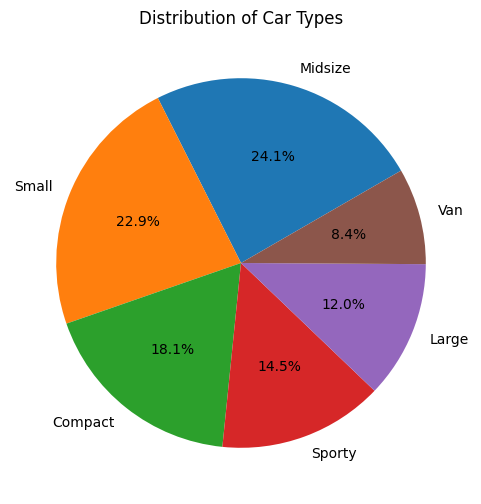

In [15]:
typeCount = df['Type'].value_counts(normalize=True)
# typeCount
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=30)

# Add a title
plt.title('Distribution of Car Types')

# Display the pie chart
plt.show()

## Seaborn
Please refer the [official doc](https://seaborn.pydata.org/).

### Boxplot
Plot *boxplot* which comparing the `Price` according to `Manufacturer`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Blues` color palette


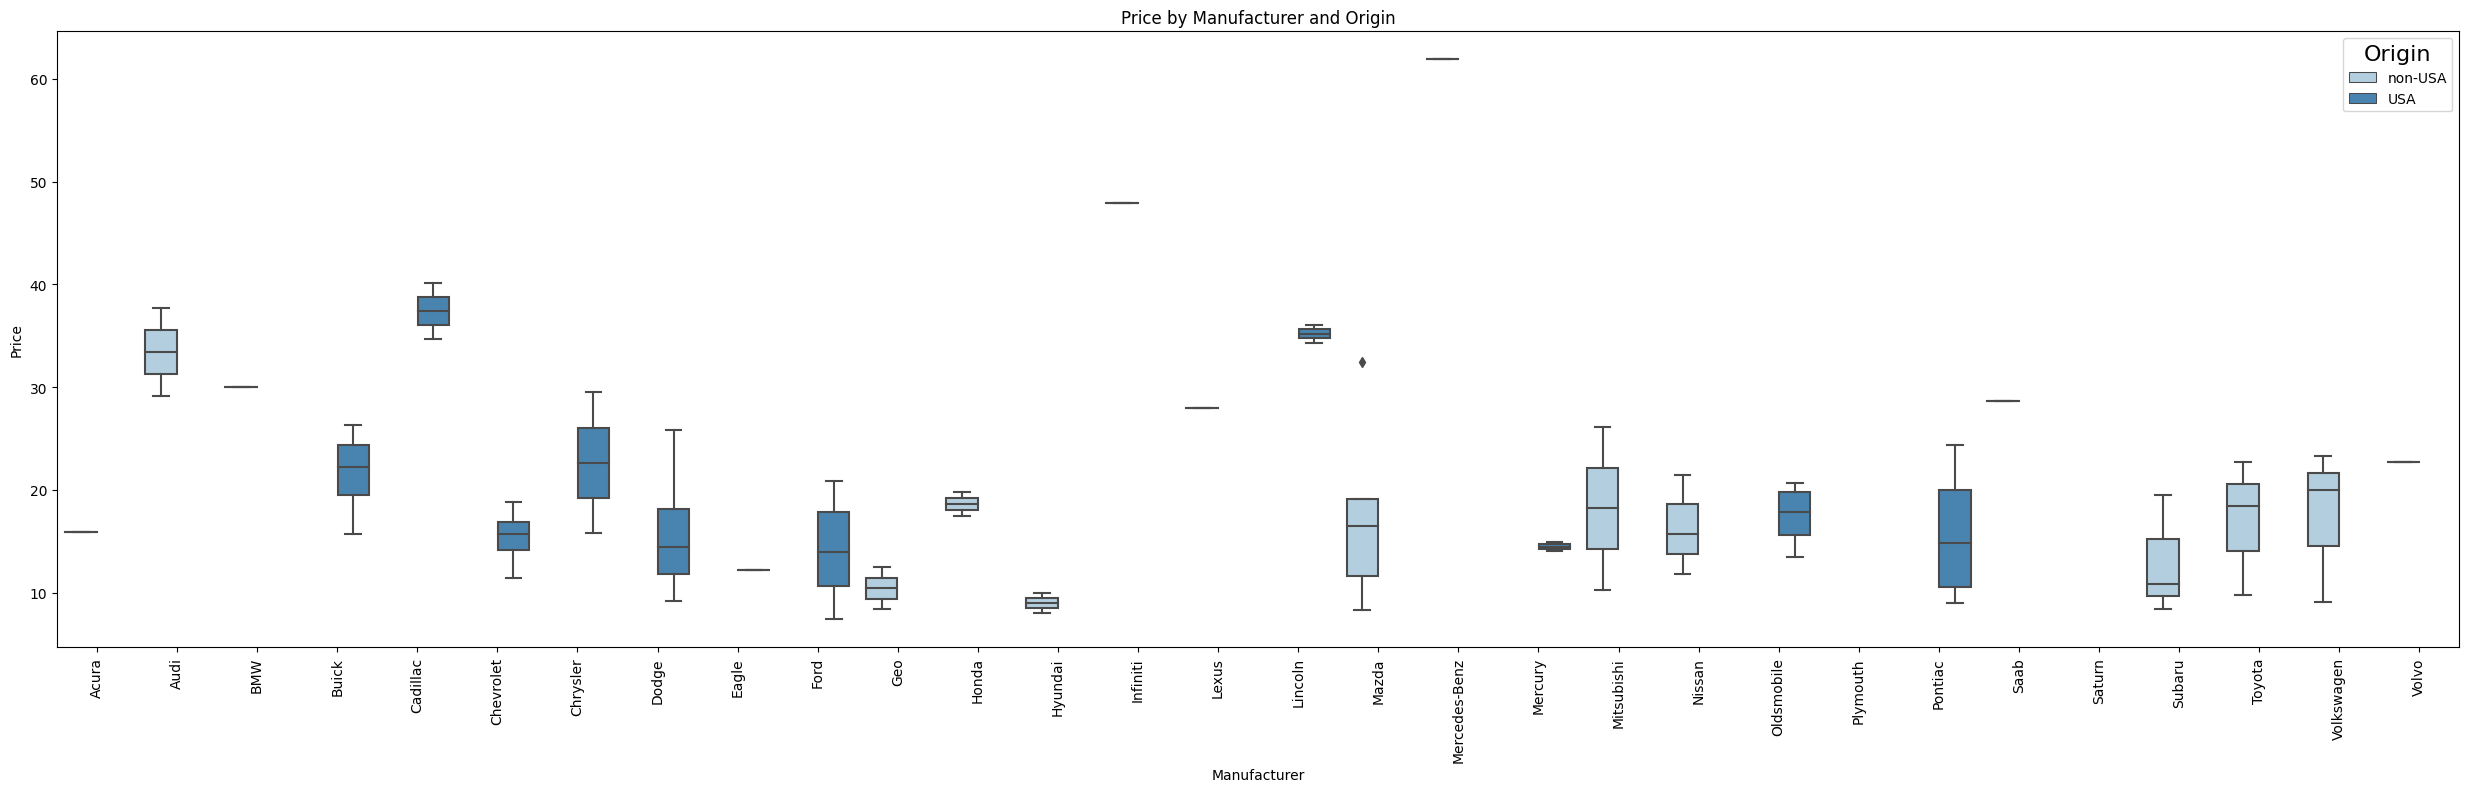

In [16]:

plt.figure(figsize=(31, 8))
sns.boxplot(data=df, x='Manufacturer', y='Price', hue='Origin', palette='Blues')

plt.title('Price by Manufacturer and Origin')
plt.xlabel('Manufacturer')
plt.ylabel('Price')

# Adjust the legend
plt.legend(title='Origin', title_fontsize='16', loc='upper right')

plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility

plt.show()

### Heatmap and Pairplot
This part brought the correlation problem that was dealt with in the previous practice problem. Please refer `lecture3.ipynb`

- Select `Price`,`Horsepower`, `Passengers`, `Length`, `Weight`
- Put this in the `df`
- Use the `pearson` method to obtain the correlation value


In [17]:
# Assuming you have a DataFrame named df
selected_columns = ['Price', 'Horsepower', 'Passengers', 'Length', 'Weight']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

# Calculate the correlation using the Pearson method
correlation_matrix = df_selected.corr(method='pearson')

# Print the correlation values
print(correlation_matrix)

               Price  Horsepower  Passengers    Length    Weight
Price       1.000000    0.789746    0.023188  0.564516  0.663561
Horsepower  0.789746    1.000000   -0.068561  0.535448  0.767323
Passengers  0.023188   -0.068561    1.000000  0.460213  0.529527
Length      0.564516    0.535448    0.460213  1.000000  0.816824
Weight      0.663561    0.767323    0.529527  0.816824  1.000000


Make *heatmap*!
- Set annot to `True`and Make it the `4th` decimal place
- Set the color to `bone_r`
- refer ([sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html))

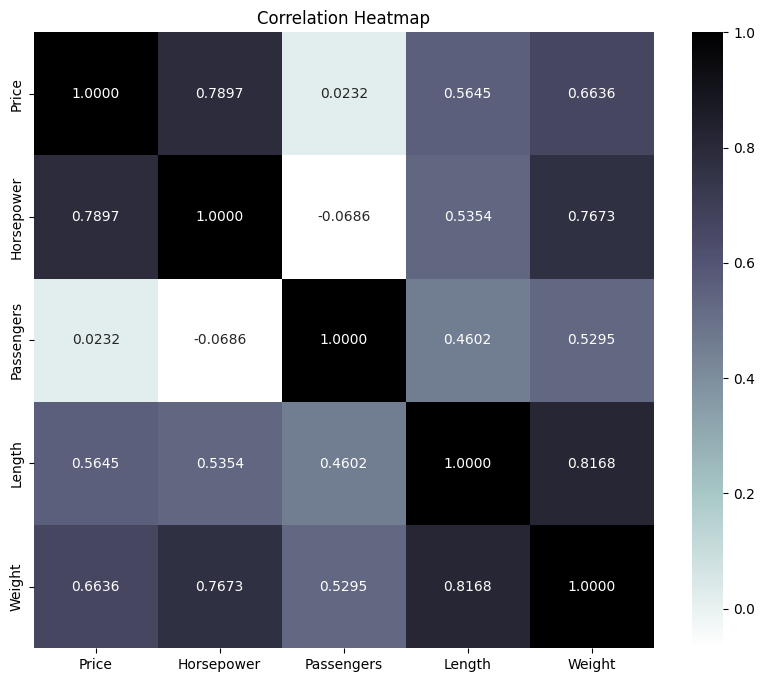

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="bone_r")

plt.title("Correlation Heatmap")
plt.show()

Plot *pair plot*. The plot must satisify following conditions.

- Create a pair plot using the `targetvar` value above
- Put the corr value in the pair plot in `text format`!

<ipython-input-25-383d09602d67>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


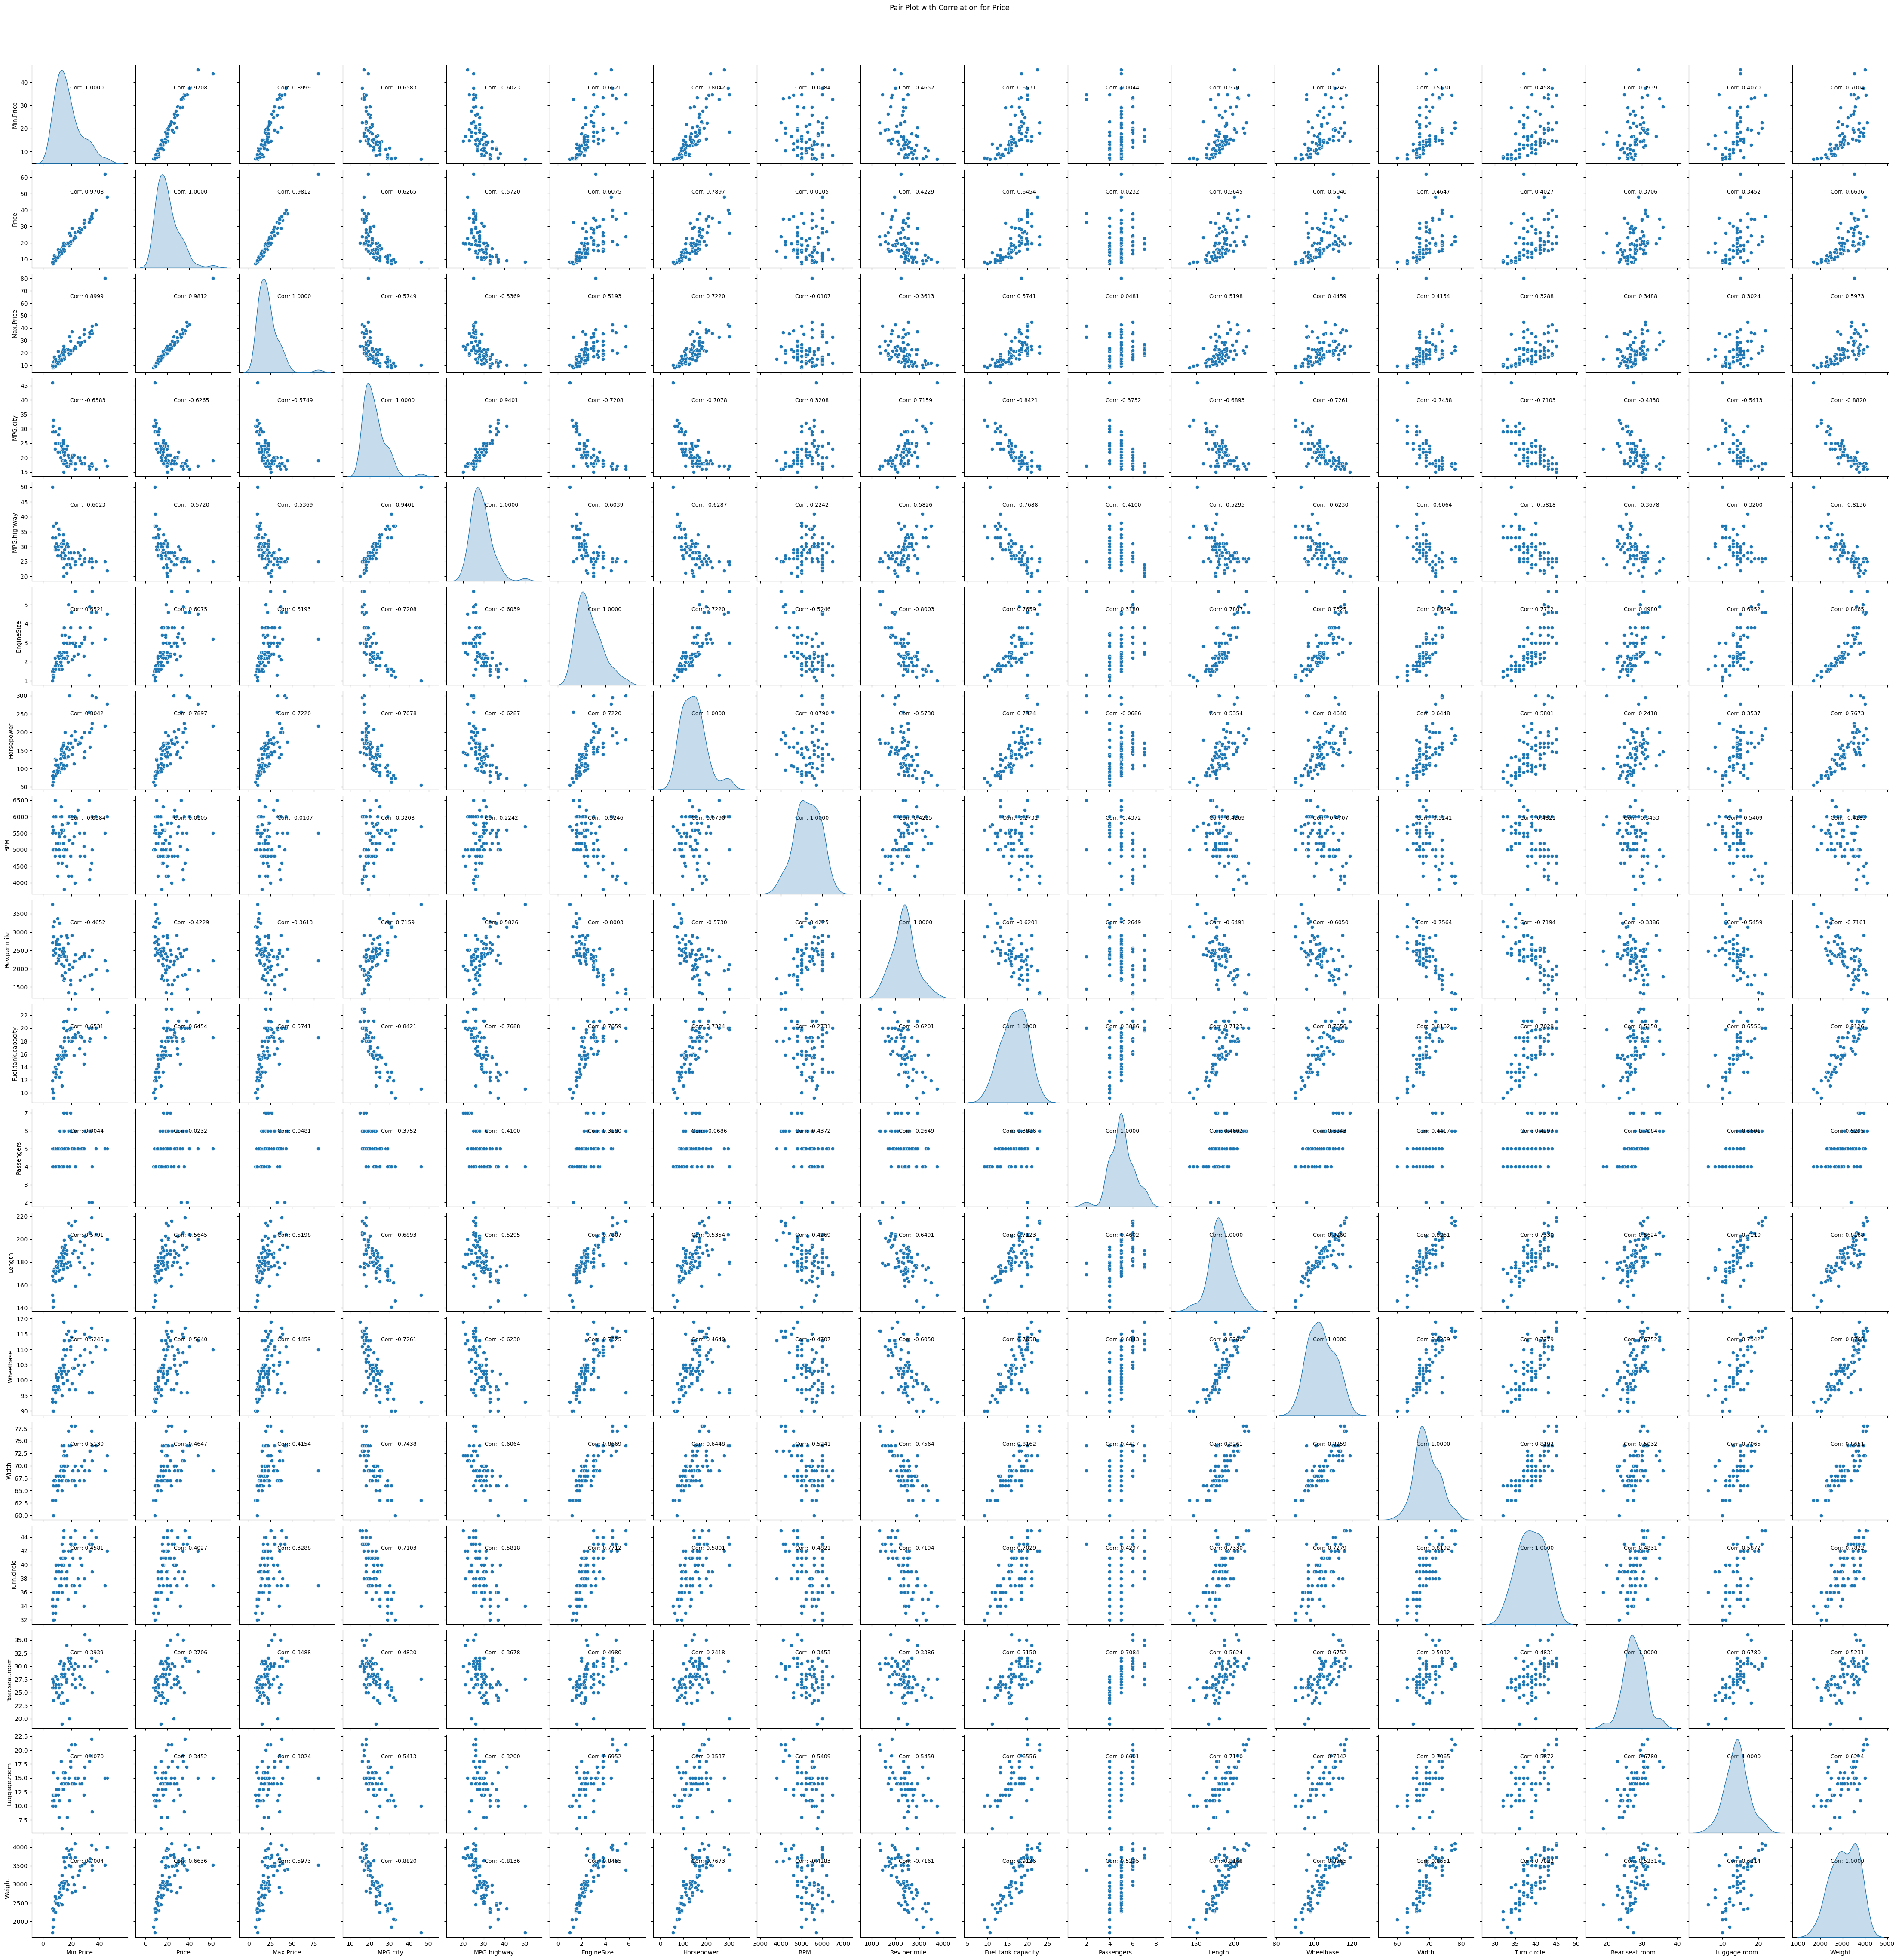

In [25]:
# Assuming you have a DataFrame named df and a target variable
# Specify the target variable (e.g., 'Price')
target_var = 'Price'

# Create a pair plot
g = sns.pairplot(df, diag_kind='kde')
plt.suptitle(f'Pair Plot with Correlation for {target_var}', y=1.02)

# Calculate the correlation matrix
corr = df.corr()

# Flatten the correlation matrix to a 1D array
corrValue = corr.to_numpy().flatten()

# Iterate through the pair plot axes and add correlation values as text
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue)):
    ax.text(0.4, 0.8, f"Corr: {cv:.4f}", fontsize=9,
            horizontalalignment="left", verticalalignment="top",
            transform=ax.transAxes)

plt.show()

## Plotly

### Density contour plot
Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable among `MPG.city`, `MPG.highway`, `Rev.per.mile`.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [27]:
# install packages
!pip install dash

In [28]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output


# Load Dash App
app = dash.Dash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options=[{'label' : 'city','value' : 'MPG.city'},
                                                        {'label' : 'highway','value' : 'MPG.highway'},
                                                        {'label' : 'per.mile','value' : 'Rev.per.mile'},],
                                               value = 'MPG.city'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df,x="Price",y=dropdown_value,
                             marginal_x="histogram",
                             marginal_y="histogram")

    return fig

if __name__ == '__main__':
    app.run_server(host='localhost', port=1050)

<IPython.core.display.Javascript object>